In [1]:
import sklearn
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split

C:\Users\tsmar\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df_wine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", header=None)

In [3]:
df_wine.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
df_wine.columns = ['Class Label', 'Alcohol', 'Malic Acid', 'Ash', 'Alcalinity of Ash', 'Magnesium',
                   'Total phenols', 'Flavanoids', 'Nonflavinoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 
                   'Proline']

In [5]:

df_wine['Alcohol'] = df_wine['Alcohol'] / 10
df_wine['Alcalinity of Ash'] = df_wine['Alcalinity of Ash'] / 10
df_wine['Magnesium'] = df_wine['Magnesium'] / 100
df_wine['Proline'] = df_wine['Proline'] / 1000
df_wine.head()

,Class Label,Alcohol,Malic Acid,Ash,Alcalinity of Ash,Magnesium,Total phenols,Flavanoids,Nonflavinoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,1.423,1.71,2.43,1.56,1.27,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1.065
1,1,1.320,1.78,2.14,1.12,1.00,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1.050
2,1,1.316,2.36,2.67,1.86,1.01,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1.185
3,1,1.437,1.95,2.50,1.68,1.13,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1.480
4,1,1.324,2.59,2.87,2.10,1.18,2.80,2.69,0.39,1.82,4.32,1.04,2.93,0.735


In [6]:
X = df_wine.iloc[:, 1:].values
y = df_wine.iloc[:, 0].values

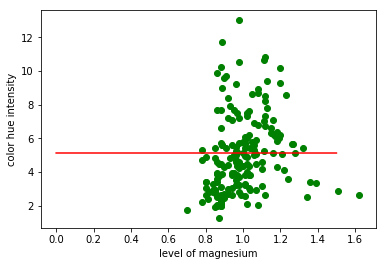

-0.0006667054393059523


In [17]:
#LETS DO SLR ON MAGNESIUM CONTENT COMPARED TO COLOR INTENSITY.
x1, y1 = df_wine.iloc[:, 5], df_wine.iloc[:, 10]

def get_slr(x, y):
    yh = np.mean(y)
    xh = np.mean(X)
    num = 0
    denom = 0
    for ind in range(len(x)):
        xi = x[ind]
        yi = y[ind]
        num += (xi - xh)*(yi - yh)
        denom += (xi - xh)
    B = num / denom
    a = yh - (B*xh)
    return a, B
                     
a, B = get_slr(x1, y1)

def f(x):
    return a + (B*x)

xr = np.arange(0.0, 1.6, 0.1)
yr = [f(xi) for xi in xr]

import matplotlib
import matplotlib.pyplot as plt

plt.scatter(x1, y1, color='green')
plt.plot(xr, yr, color='red')
plt.xlabel('level of magnesium')
plt.ylabel('color hue intensity')
plt.show()

print(B)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [8]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, random_state=0)
svm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [9]:
y_pred = svm.predict(X_test)

In [10]:
def accuracy_report(y_pred, y_actual):
    val = [(y_pred[i] == y_actual[i]) for i in range(len(y_pred))]
    return sum(val) / len(val)

In [11]:
accuracy_report(y_pred, y_test)

0.9444444444444444

In [27]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion='entropy', n_estimators=100, random_state=1, n_jobs=2)

In [28]:
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=2,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [29]:
yh = forest.predict(X_test)

In [31]:
accuracy_report(yh, y_test)

0.9629629629629629

# Results:
- so a random forest with 100 trees gets 96.3%
- a SVM with a linear kernel gets 94.4 % 

In [41]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3, p=2, metric='minkowski') #uses Euclidian because thats what minkowski is at p=2

In [42]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [43]:
yp = knn.predict(X_test)

In [44]:
accuracy_report(yp, y_test)

0.9074074074074074

In [45]:
#three nearest neighbors is better than 5? why? because less overfitting ! 

# NOW TO TRY MLR to use some features to predict another:

In [32]:
import statsmodels.api as sm

In [33]:
df_wine.head()

,Class Label,Alcohol,Malic Acid,Ash,Alcalinity of Ash,Magnesium,Total phenols,Flavanoids,Nonflavinoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,1.423,1.71,2.43,1.56,1.27,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1.065
1,1,1.320,1.78,2.14,1.12,1.00,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1.050
2,1,1.316,2.36,2.67,1.86,1.01,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1.185
3,1,1.437,1.95,2.50,1.68,1.13,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1.480
4,1,1.324,2.59,2.87,2.10,1.18,2.80,2.69,0.39,1.82,4.32,1.04,2.93,0.735


In [34]:
X = df_wine.iloc[:, 2:] #all other features
y = df_wine.iloc[:, 1] #alcohol content

# Data Science Review
- lets perform the appropriate statistical test at the $\alpha$ = 0.01 significance level to determine if **at least one** of the features of the wine is related to the alcohol content!
- perform an F-test for ML-regression at the $\alpha$ = 0.01 sig level
- This F-statistic is calculated by: 
    - $\frac{Explained Variance}{Unexplained Variance}$
    - which is equal to: $\frac{MSM}{MSE}$
    - where MSM is: $\frac{SSM}{DFM}$ which is the explained variance
    - where MSE is: $\frac{SSE}{DFE}$ which is the unexplained variance
    - **SSM** == sum of squared differences
    - **DFM** == deg free = p - 1 == (# of features - 1)
    - **SSE** == sum of squared differences between the MLR model and the mean. 
    - **DFE** == n - p == (number of samples - number of features)
- Now lets compute this value with python: If F > 1 then at least one feature is relevant.  

In [35]:
x = sm.add_constant(X)
model = sm.OLS(y, x).fit()
f = model.fvalue
fp = model.f_pvalue
print("f = ", f, "\n p = ", fp)
fp > 0.01

f =  20.080108143796934 
 p =  1.61483658097759e-26


False

In [36]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Alcohol   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     20.08
Date:                Sat, 08 Jun 2019   Prob (F-statistic):           1.61e-26
Time:                        14:06:02   Log-Likelihood:                 275.03
No. Observations:                 178   AIC:                            -524.1
Df Residuals:                     165   BIC:                            -482.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            1.1072      0.060     18.567      0.000       0.989       1.225
Malic Acid                       0.0132      0.005      2.907      0.004       0.004       0.022
Ash                              0.0138      0.022      0.636      0.526      -0.029       0.057
Alcalinity of Ash               -0.0378      0.018     -2.122      0.035      -0.073      -0.003
Magnesium                     4.179e-05      0.034      0.001      0.999      -0.066       0.066
Total phenols                    0.0052      0.013      0.389      0.698      -0.021       0.032
Flavanoids                       0.0009      0.011      0.085      0.932      -0.020       0.022
Nonflavinoid phenols            -0.0208      0.043     -0.479      0.632      -0.106       0.065
Proanthocyanins                 -0.0152      0.010     -1.552      0.122      -0.035       0.004
Color intensity                  0.0163      0.003      5.941      0.000       0.011       0.022
Hue                              0.0217      0.028      0.772      0.441      -0.034       0.077
OD280/OD315 of diluted wines     0.0161      0.011      1.466      0.145      -0.006       0.038
Proline                          0.1016      0.020      5.081      0.000       0.062       0.141
==============================================================================
Omnibus:                        0.348   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.840   Jarque-Bera (JB):                0.121
Skew:                           0.025   Prob(JB):                        0.941
Kurtosis:                       3.118   Cond. No.                         130.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""